# Дерево решений

<div align="left"><img src="images/1.png" width="700"/></div>

## Критерий информативности

**Критерий информативности** - эвристика того, насколько классы перемешаны в некотором подмножестве выборки.

- Для регрессии: 

### $$ H(X) = \frac{1}{|X|} \sum \limits_{i \in X} (y_i - \overline{y}(X))^2 $$

- Для классификации:
    - Доля объектов класса k в выборке X:
      ### $$ p_k = \frac{1}{|X|} \sum \limits_{i \in X} [y_i = k] $$
    - Критерий Джини:
      ### $$ H(X) = \sum\limits_{k=1}^{K}p_k(1-p_k) $$
    - Энтропийный критерий (по Шеннону):

### $$ H(X) = -\sum_{k=1}^{K}p_k \ln{p_k} $$

<div align="center"><img src="images/2.png" width="700"/></div>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns

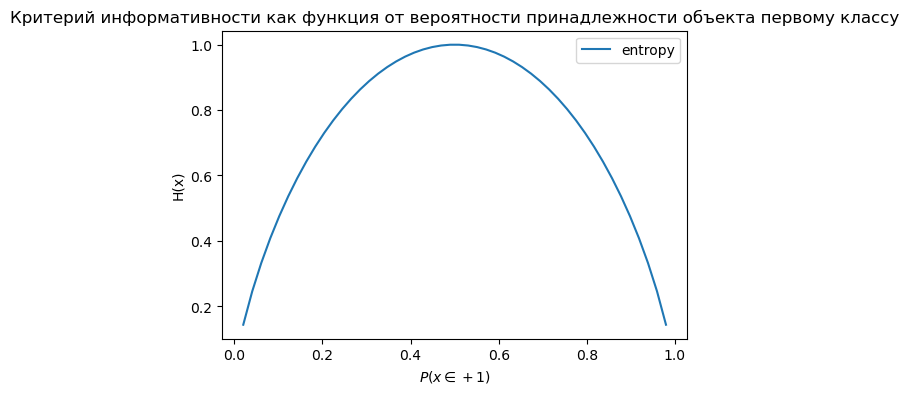

In [155]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.xlabel('$P(x \in +1)$')
plt.ylabel('H(x)')
plt.title('Критерий информативности как функция от вероятности принадлежности объекта первому классу')
plt.legend();

## Критерий ошибки

## $$ Q(X_m, j, t) = \frac{|X_l|}{|X_m|}H(X_l) + \frac{|X_r|}{|X_m|}H(X_r) $$

- $ \frac{|X_l|}{|X_m|} $ - доля объектов в левом листе относительно всех объектов родительского узла
- $ H(X_l) $ - разброс ответов в левом листе
- - $ \frac{|X_r|}{|X_m|} $ - доля объектов в правом листе относительно всех объектов родительского узла
- $ H(X_r) $ - разброс ответов в правом листе

Источник: https://habr.com/ru/articles/171759/

<div align="center"><img src="images/3.png" width="700"/></div>

## Алгоритм построения решающего дерева

1. Вычисляем энтропию исходного множества
2. Если энтропия равна 0, то все объекты исходного набора принадлежат одному классу. Сохраним этот класс в виде листа дерева
3. Если энтропия не равна 0, то:
   - для каждого элемента, для каждого его признака генерируем предикат $ X_{ij} \le const $, который разбивает множество объектов на два подмножества
   - рассчитываем среднее значение энтропии по двум новым подмножествам для каждого варианта разбиения
   - вычисляем разницу этой средней энтропии и энтропии исходного множества из п. 1. Предикат, дающий наибольшую разницу, встраиваем в дерево
4. Повторяем все пункты для каждого из двух поддеревьев, получившихся в результате последнего подпункта п. 3

## Разделяющая поверхность решающего дерева

Нагенерируем выборку объектов:

In [2]:
class0 = np.random.normal([0, 0], 5, size=(100, 2))
class1 = np.random.normal([10, 8], 5, size=(100, 2))

class0_df = pd.DataFrame(class0, columns=["x1", "x2"])
class0_df["y"] = 0

class1_df = pd.DataFrame(class1, columns=["x1", "x2"])
class1_df["y"] = 1

df = pd.concat([class0_df, class1_df])
df

,x1,x2,y
0,0.122466,0.580313,0
1,-5.567238,-2.271074,0
2,-4.178287,-5.298268,0
3,4.175463,2.412144,0
4,-0.709209,-2.935595,0
...,...,...,...
95,6.875041,12.547505,1
96,5.791196,15.527116,1
97,14.185315,10.569268,1
98,14.538788,8.020687,1


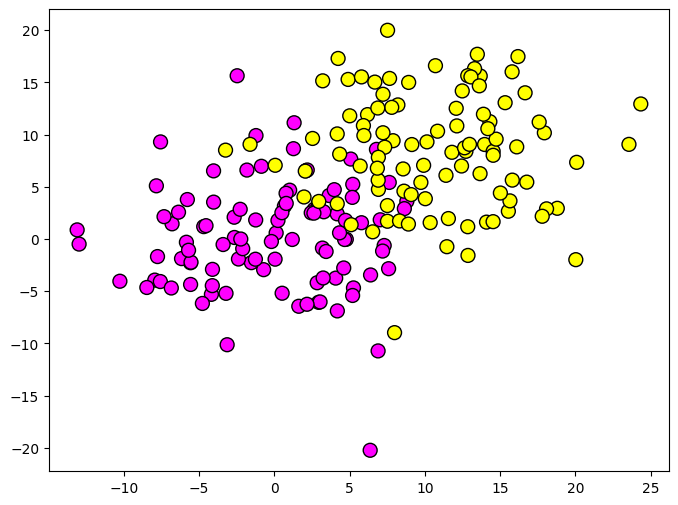

In [3]:
plt.rcParams['figure.figsize'] = (8,6)
plt.scatter(df["x1"], df["x2"], c=df["y"], s=100, cmap="spring", edgecolors='black')

Обучим решающее дерево:

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree.fit(df[["x1", "x2"]], df["y"])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Отрисуем разделяющую поверхность дерева на графике.

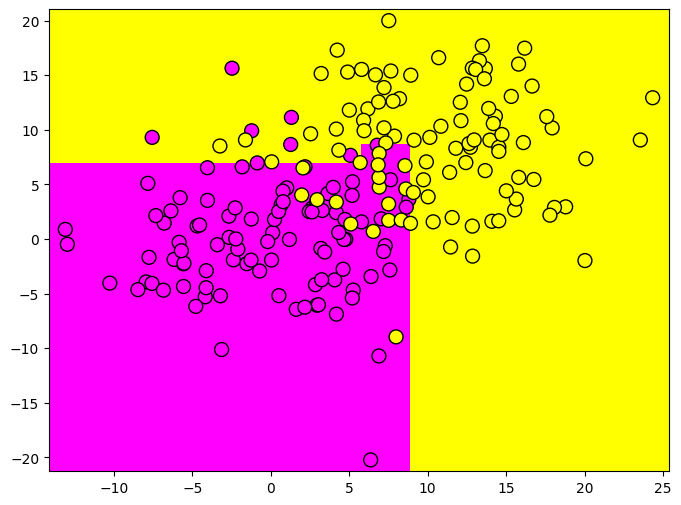

In [15]:
x1_min, x2_min = df["x1"].min() - 1, df["x2"].min() - 1
x1_max, x2_max = df["x1"].max() + 1, df["x2"].max() + 1

x1_grid, x2_grid = np.meshgrid(np.linspace(x1_min, x1_max, 500), np.linspace(x2_min, x2_max, 500))
predictions = tree.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()]).reshape(x1_grid.shape)

plt.pcolormesh(x1_grid, x2_grid, predictions, cmap='spring')
plt.scatter(df["x1"], df["x2"], c=df["y"], s=100, cmap="spring", edgecolors='black')

[array([-14.09690989, -14.01786981, -13.93882973, ...,  25.18601158,
         25.26505166,  25.34409175]),
 array([-21.23435498, -21.23435498, -21.23435498, ...,  20.99372475,
         20.99372475,  20.99372475])]

А теперь посмотрим, как выглядит само решающее дерево.

[Text(0.5769230769230769, 0.875, 'x[0] <= 5.79\nentropy = 1.0\nsamples = 200\nvalue = [100, 100]'),
 Text(0.3076923076923077, 0.625, 'x[1] <= 3.264\nentropy = 0.616\nsamples = 105\nvalue = [89, 16]'),
 Text(0.15384615384615385, 0.375, 'x[0] <= 4.942\nentropy = 0.111\nsamples = 68\nvalue = [67, 1]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.0\nsamples = 64\nvalue = [64, 0]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.46153846153846156, 0.375, 'x[1] <= 6.979\nentropy = 0.974\nsamples = 37\nvalue = [22, 15]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.722\nsamples = 20\nvalue = [16, 4]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.937\nsamples = 17\nvalue = [6, 11]'),
 Text(0.8461538461538461, 0.625, 'x[0] <= 8.856\nentropy = 0.517\nsamples = 95\nvalue = [11, 84]'),
 Text(0.7692307692307693, 0.375, 'x[1] <= 8.69\nentropy = 0.888\nsamples = 36\nvalue = [11, 25]'),
 Text(0.6923076923076923, 0.125, 'entropy = 1.0\nsamples = 22\nv

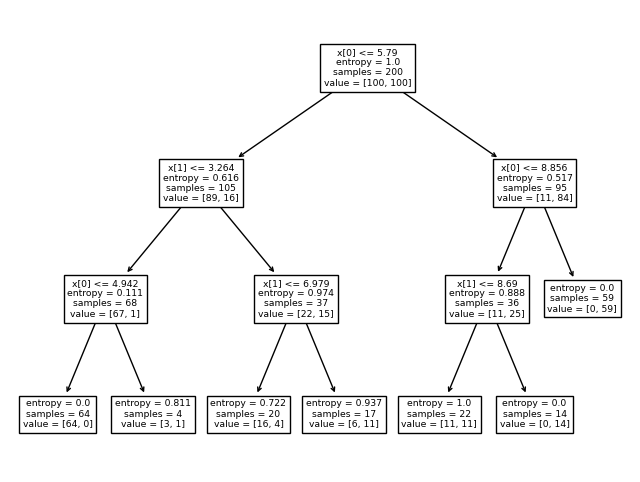

In [16]:
from sklearn.tree import plot_tree

plot_tree(tree)

## Как дерево работает с количественными признаками

Построим классификатор, который будет решать, стоит ли брать человека на работу водителем такси по паре признаков:

- $ X_1 $ — cтаж вождения (лет)
- $ X_2 $ — количество нарушений ПДД за последние 2 года

Класс Y:
- 1 — возьмут на работу
- 0 — не возьмут на работу

In [17]:
data = pd.DataFrame({
    "Стаж": [1.5, 2.0, 1.8, 3.0, 2.5, 3.2, 7.0, 8.5, 7.8, 9.0, 8.2, 7.5], 
    "Нарушения ПДД": [7, 5, 6, 0, 1, 6, 1, 0, 5, 6, 1, 0],
    "Класс": [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1],
})

data

,Стаж,Нарушения ПДД,Класс
0,1.5,7,0
1,2.0,5,0
2,1.8,6,0
3,3.0,0,1
4,2.5,1,0
5,3.2,6,1
6,7.0,1,1
7,8.5,0,1
8,7.8,5,0
9,9.0,6,0


Отсортируем по возрастанию стажа и для начала оставим только признак "Стаж":

In [18]:
data.sort_values("Стаж")[["Стаж", "Класс"]]

,Стаж,Класс
0,1.5,0
2,1.8,0
1,2.0,0
4,2.5,0
3,3.0,1
5,3.2,1
6,7.0,1
11,7.5,1
8,7.8,0
10,8.2,1


Посмотрим на дерево, обученное только по одному признаку:

[Text(0.4, 0.9, 'Стаж <= 2.75\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.7, 'Стаж <= 8.75\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.4, 0.5, 'Стаж <= 7.65\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.3, 'Стаж <= 8.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

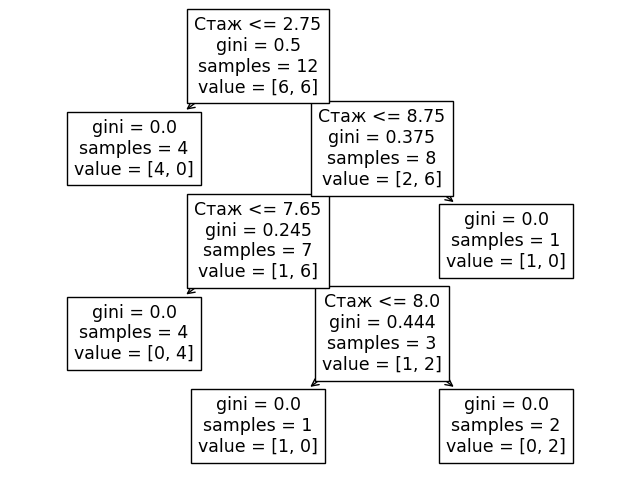

In [19]:
tree = DecisionTreeClassifier(random_state=10).fit(data[["Стаж"]], data["Класс"])
plot_tree(tree, feature_names=["Стаж"])

Видим, что дерево строит свои предикаты только в тех точках-значениях признака, в которых на сортированной выборке меняется значение целевой переменной. Теперь рассмотрим оба признака:

[Text(0.3333333333333333, 0.875, 'Стаж <= 2.75\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5, 0.625, 'ДТП <= 3.0\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6666666666666666, 0.375, 'Стаж <= 5.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

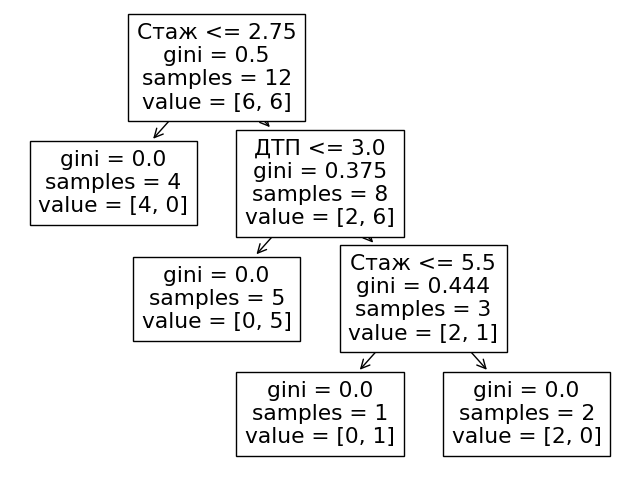

In [20]:
tree = DecisionTreeClassifier(random_state=10).fit(data.drop("Класс", axis=1), data["Класс"])
plot_tree(tree, feature_names=["Стаж", "ДТП"])

Видим, что в дереве задействованы как разбиения по стажу, так и по количеству ДТП. При этом оказывается, что, исходя из критерия неопределенности Джини, необязательно перебирать вообще все возможные пороги: достаточно пройтись по тем значениям признаков, при которых меняется класс целевой переменной при сортировке строк по каждому из признаков.

## Переобучение деревьев

1. Строим максимально переобученное дерево;
2. Удаляем листья по некоторому критерию (например, пока улучшается качество модели на валидации)

Тем не менее, это достаточно трудоемкая процедура, и она имеет смысл только при использовании одиночного дерева. Более часто используются параметры ограничения построения дерева:

- `max_depth` - максимальная глубина построения деревьев
- `max_features` - максимальное количество признаков, по которым ищется оптимальное разбиение
- `max_samples_leaf` - максимальное количество объектов в листе

## Дерево решений в задаче регрессии
 
 При прогнозировании количественного признака идея построения дерева остается та же, но меняется критерий качества: 
 
 - Дисперсия вокруг среднего: $$H(X) = \frac{1}{|X|} \sum \limits_{i \in X} (y_i - \overline{y}(X))^2 $$
 Минимизируя дисперсию вокруг среднего, мы ищем признаки, разбивающие выборку таким образом, что значения целевого признака в каждом листе примерно равны.

Попробуем аппроксимировать деревом решений синус:

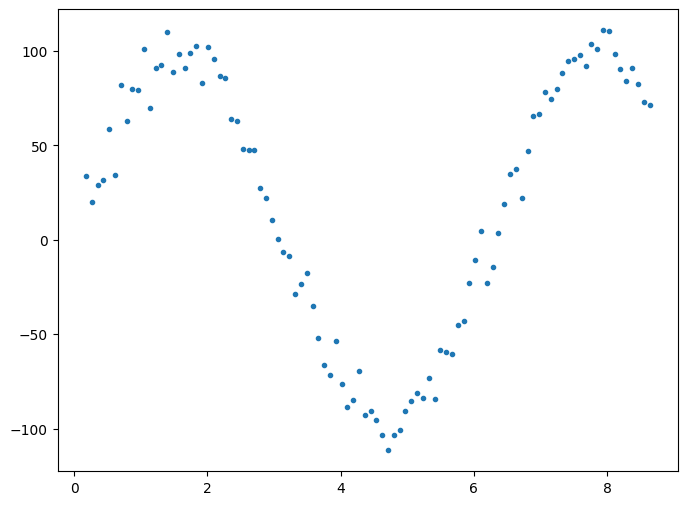

In [21]:
# генерация обучающей выборки
x_train = np.array([i * np.pi / 180 for i in range(10, 500, 5)])
np.random.seed(1)
y_train = 100 * np.sin(x_train) + np.random.normal(0, 10, len(x_train))
data_train = pd.DataFrame(np.column_stack([x_train, y_train]), columns=['x', 'y'])
plt.plot(data_train['x'], data_train['y'], '.')

In [22]:
# генерация тестовой выборки
x_test = np.array([i * np.pi / 180 for i in range(0, 550, 1)])
np.random.seed(1)
y_test = 100 * np.sin(x_test) + np.random.normal(0, 10, len(x_test))
data_test = pd.DataFrame(np.column_stack([x_test, y_test]), columns=['x', 'y'])

In [23]:
# импортируем дерево решений для регрессии
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5).fit(data_test[["x"]], data_test["y"])
tree_predictions = tree.predict(data_test[["x"]])

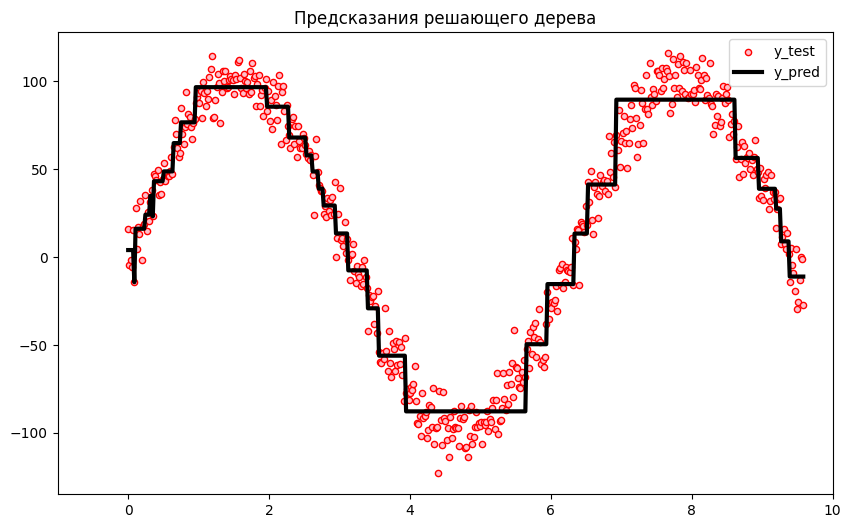

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, c="pink", s=20, edgecolors="red")
plt.plot(x_test, tree_predictions, "black", lw=3)
plt.xlim([-1, 10])
plt.legend(["y_test", "y_pred"])
plt.title("Предсказания решающего дерева")
plt.show()

## Плюсы и минусы деревьев

Плюсы:

- Порождение четких правил классификации, понятных человеку (интерпретируемость модели);
- Деревья решений могут легко визуализироваться;
- Быстрые процессы обучения и прогнозирования;
- Малое число параметров модели;
- Поддержка и числовых, и категориальных признаков.

Минусы:
- Очень чувствительны к шумам во входных данных;
- Разделяющая граница, построенная деревом решений, имеет свои ограничения;
- Необходимость отсекать ветви дерева (pruning) или устанавливать минимальное число элементов в листьях (переобучение);
- Нестабильность;
- Проблема поиска оптимального дерева решений (минимального по размеру и способного без ошибок классифицировать выборку);
- Сложно поддерживаются пропуски в данных;
- Модель умеет только интерполировать, но не экстраполировать.